# How to Generate the Plasma Graph

After running a simulation, TARDIS has the ability to create a [graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)) showcasing how each variable used to compute the plasma state is connected and calculated (see the [Plasma Documentation](../../physics/setup/plasma/index.rst) for more information). To do so, one needs to utilize the `write_to_tex` command to generate a .tex file that displays the graph. This tutorial aims to showcase how the .tex file can be generated and what options can be inputted to display the graph in a preferred method. To start, TARDIS needs to perform a simulation. Here the `tardis_example.yml` configuration file is used as in the [quickstart guide](../../quickstart.ipynb).

In [1]:
#downloading necessary modules
from tardis import run_tardis
from tardis.io.atom_data import download_atom_data

import networkx as nx

from IPython.display import Image, display

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
#downloading atom data
download_atom_data('kurucz_cd23_chianti_H_He')

Atomic Data kurucz_cd23_chianti_H_He already exists in /home/runner/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5. Will not download - override with force_download=True.


In [3]:
#running simulation
sim = run_tardis('tardis_example.yml')

Tabs(height=350, sizing_mode='stretch_width')
    [0] HTML(str, height=300, styles={'overflow-y': 'auto', ...})
    [1] HTML(str, height=300, styles={'overflow-y': 'auto', ...})
    [2] HTML(str, height=300, styles={'overflow-y': 'auto', ...})
    [3] HTML(str, height=300, styles={'overflow-y': 'auto', ...})

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

## Displaying the Graph Within A Jupyter Notebook

Now that TARDIS has finished a simulation run, the plasma graph can now be generated. To display the basic graph within a Jupyter Notebook, one can simply use the `nx.draw` as follows: 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


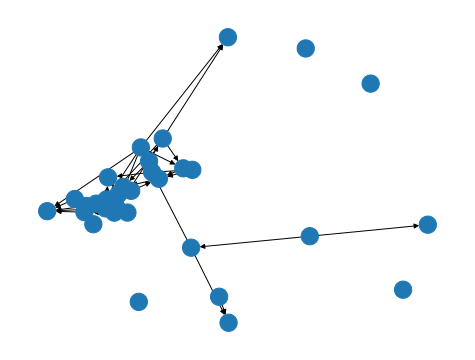

In [4]:
%pylab inline

nx.draw(sim.plasma.graph)

There are many different ways of displaying the graph in a more readable format. One such example is shown below.

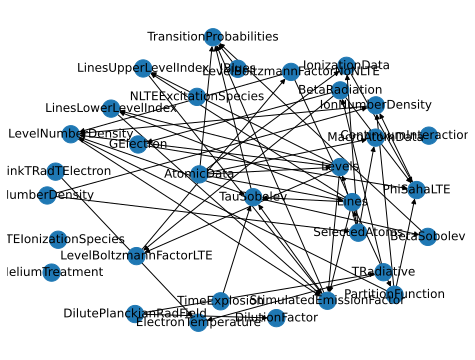

In [5]:
position = nx.spring_layout(sim.plasma.graph, k=0.75, iterations=15)

nx.draw(sim.plasma.graph, position, with_labels=True)

<div class="alert alert-info">
    
Note

For the purposes of this tutorial, pylab inline has been used to display the graph within the tutorial page. It is recommended to use pylab notebook when displaying the graph on a local Jupyter Notebook to explore the nodes in depth.

</div>

## Saving the Graph Onto a .tex File

With the `write_to_tex` command, a copy of the graph can be saved within a .tex file. Currently, there are four parameters TARDIS uses to write the graph in [LaTeX](https://en.wikipedia.org/wiki/LaTeX) and save it to a .tex file:

 <ul>
  <li> fname_graph: The name of the file TARDIS will save the graph onto (<b>required</b>)</li>
  <li> scale: a scaling factor to expand/contract the generated graph</li>
  <li> args: a list of optional settings for displaying the graph</li>
  <li> latex_label: a parameter that enables or disables writing LaTeX equations and edge labels onto the file (default set to <code>True</code> to enable writing)</li>
</ul> 

With these parameters, TARDIS can write the graph in many different ways. For this tutorial, only a few examples will be shown to display what each parameter exactly does and what the resulting graph will look like when generated in a LaTeX environment. 

<div class="alert alert-warning">
    
Warning

As of now, TARDIS has an issue of not spacing edges correctly, causing the default output to look very condensed and unreadable in certain areas. It is recommended, therefore, to use the given parameters to generate a graph that displays everything in as readable a format as possible. 

</div>

### Default Plasma Graph

From above, TARDIS only needs the name of the file it should save the graph to as default.

In [6]:
sim.plasma.write_to_tex("plasma_graph_default.tex")

With the default settings, the contents of the file will simply be the graph written in LaTeX.


In [7]:
with open("plasma_graph_default.tex", "r") as file:
    print(file.read())
    file.close()

\documentclass[class=minimal,border=20pt]{standalone}
\usepackage[x11names, svgnames, rgb]{xcolor}
\usepackage[utf8]{inputenc}
\usepackage{tikz}
\usetikzlibrary{snakes,arrows,shapes}
\usepackage{amsmath}
%
%

\usepackage[active,tightpage]{preview}
\PreviewEnvironment{tikzpicture}
\setlength\PreviewBorder{0pt}%

%

\begin{document}
\pagestyle{empty}
%
%
%


% Start of code
\begin{tikzpicture}[>=latex',line join=bevel,scale=0.5]
%%
\node (DilutePlanckianRadField) at (726.87bp,1150.6bp) [draw,ellipse] {$\textrm{DilutePlanckianRadField}$};
  \node (TRadiative) at (972.87bp,1061.4bp) [draw,ellipse] {$\textrm{TRadiative}$};
  \node (DilutionFactor) at (712.87bp,1061.4bp) [draw,ellipse] {$\textrm{DilutionFactor}$};
  \node (ElectronTemperature) at (366.87bp,972.1bp) [draw,ellipse] {$\textrm{ElectronTemperature: }\textrm{const.}\times T_{\textrm{rad}}$};
  \node (BetaRadiation) at (1103.9bp,972.1bp) [draw,ellipse] {$\textrm{BetaRadiation: }\dfrac{1}{k_{B} T_{\textrm{rad}}}$};
  \node (NumberDe

If one was to build the .tex file, the following graph will be generated:

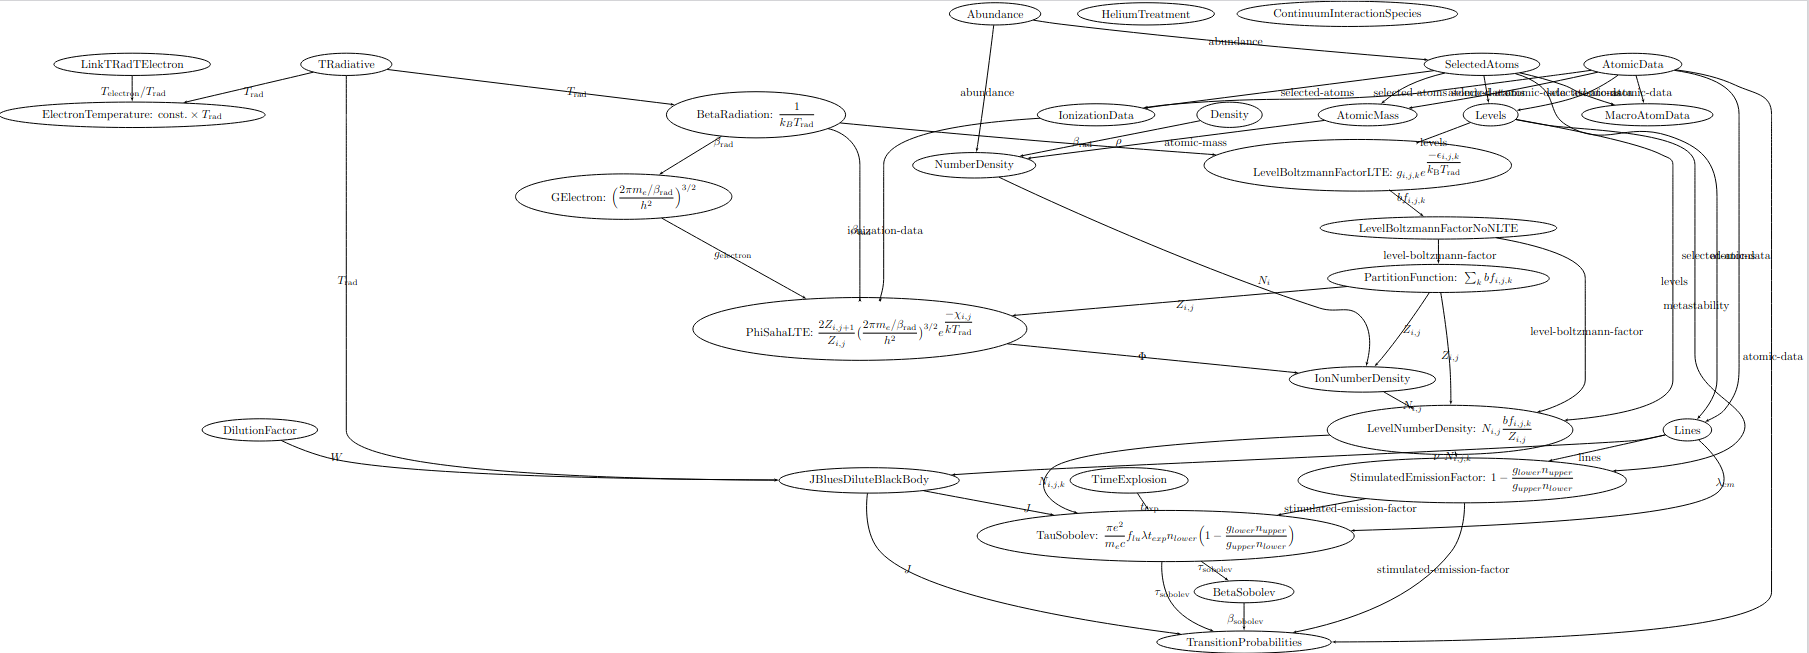

In [8]:
display(Image('default_plasma_graph.png', unconfined=True))

<div class="alert alert-info">
    
Note

For the remainder of this tutorial, the contents of the .tex file will be omitted and only the generated graph will be shown.

</div>

### Plasma Graph with Different Scale

One can change the scaling of the graph by passing in a positive, non-zero float into the `scale` parameter to either make the resulting graph larger (scale > 0.5) or smaller (scale < 0.5).

In [9]:
sim.plasma.write_to_tex("plasma_graph_scaled.tex", scale = 1.25)

With a scale of 1.25, the graph TARDIS will output will look as follows:

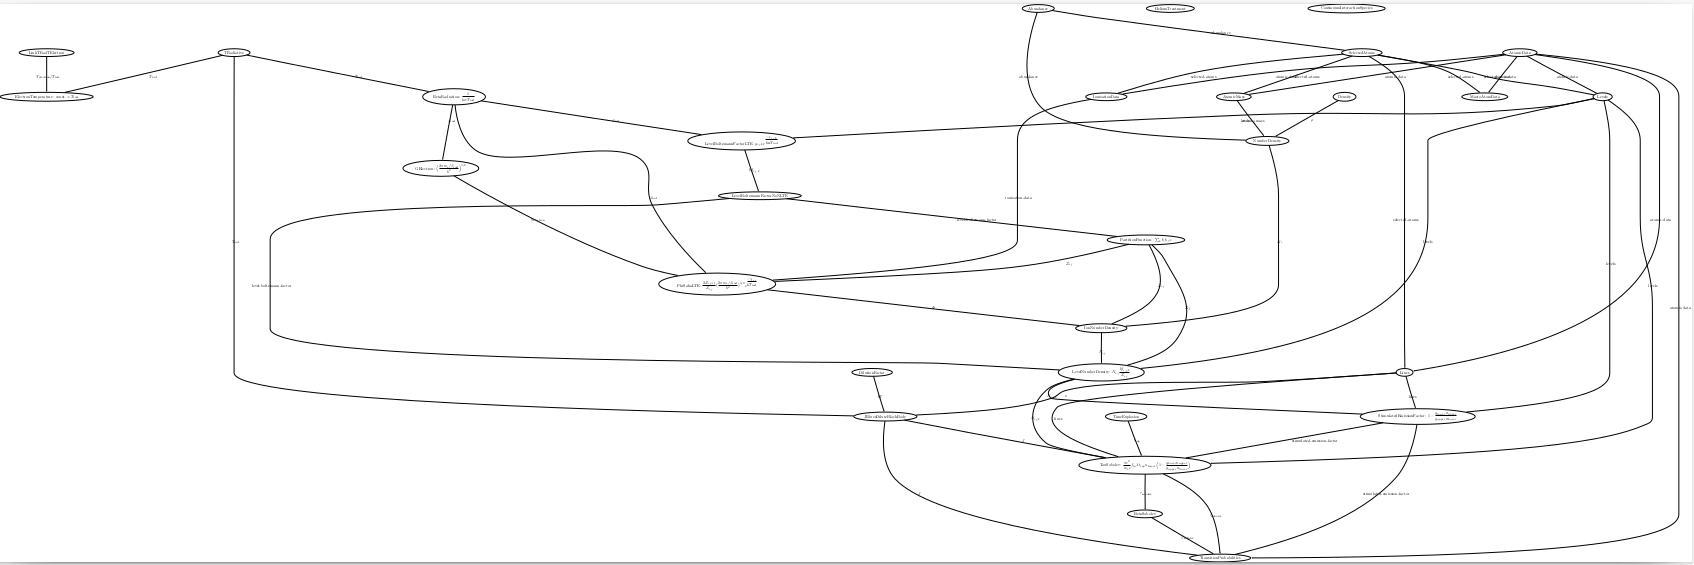

In [10]:
display(Image('plasma_graph_scaled.png', unconfined=True))

### Plasma Graph with No Equations

TARDIS has the option to generate a graph without any equations or edge labels via the `latex_label` command. The graph in this case will only consist of nodes containing the names of variables used to calculate the plasma state connected with edges.

In [11]:
sim.plasma.write_to_tex("plasma_graph_no_eq.tex", latex_label=False)

With these inputs, the graph will look like this:

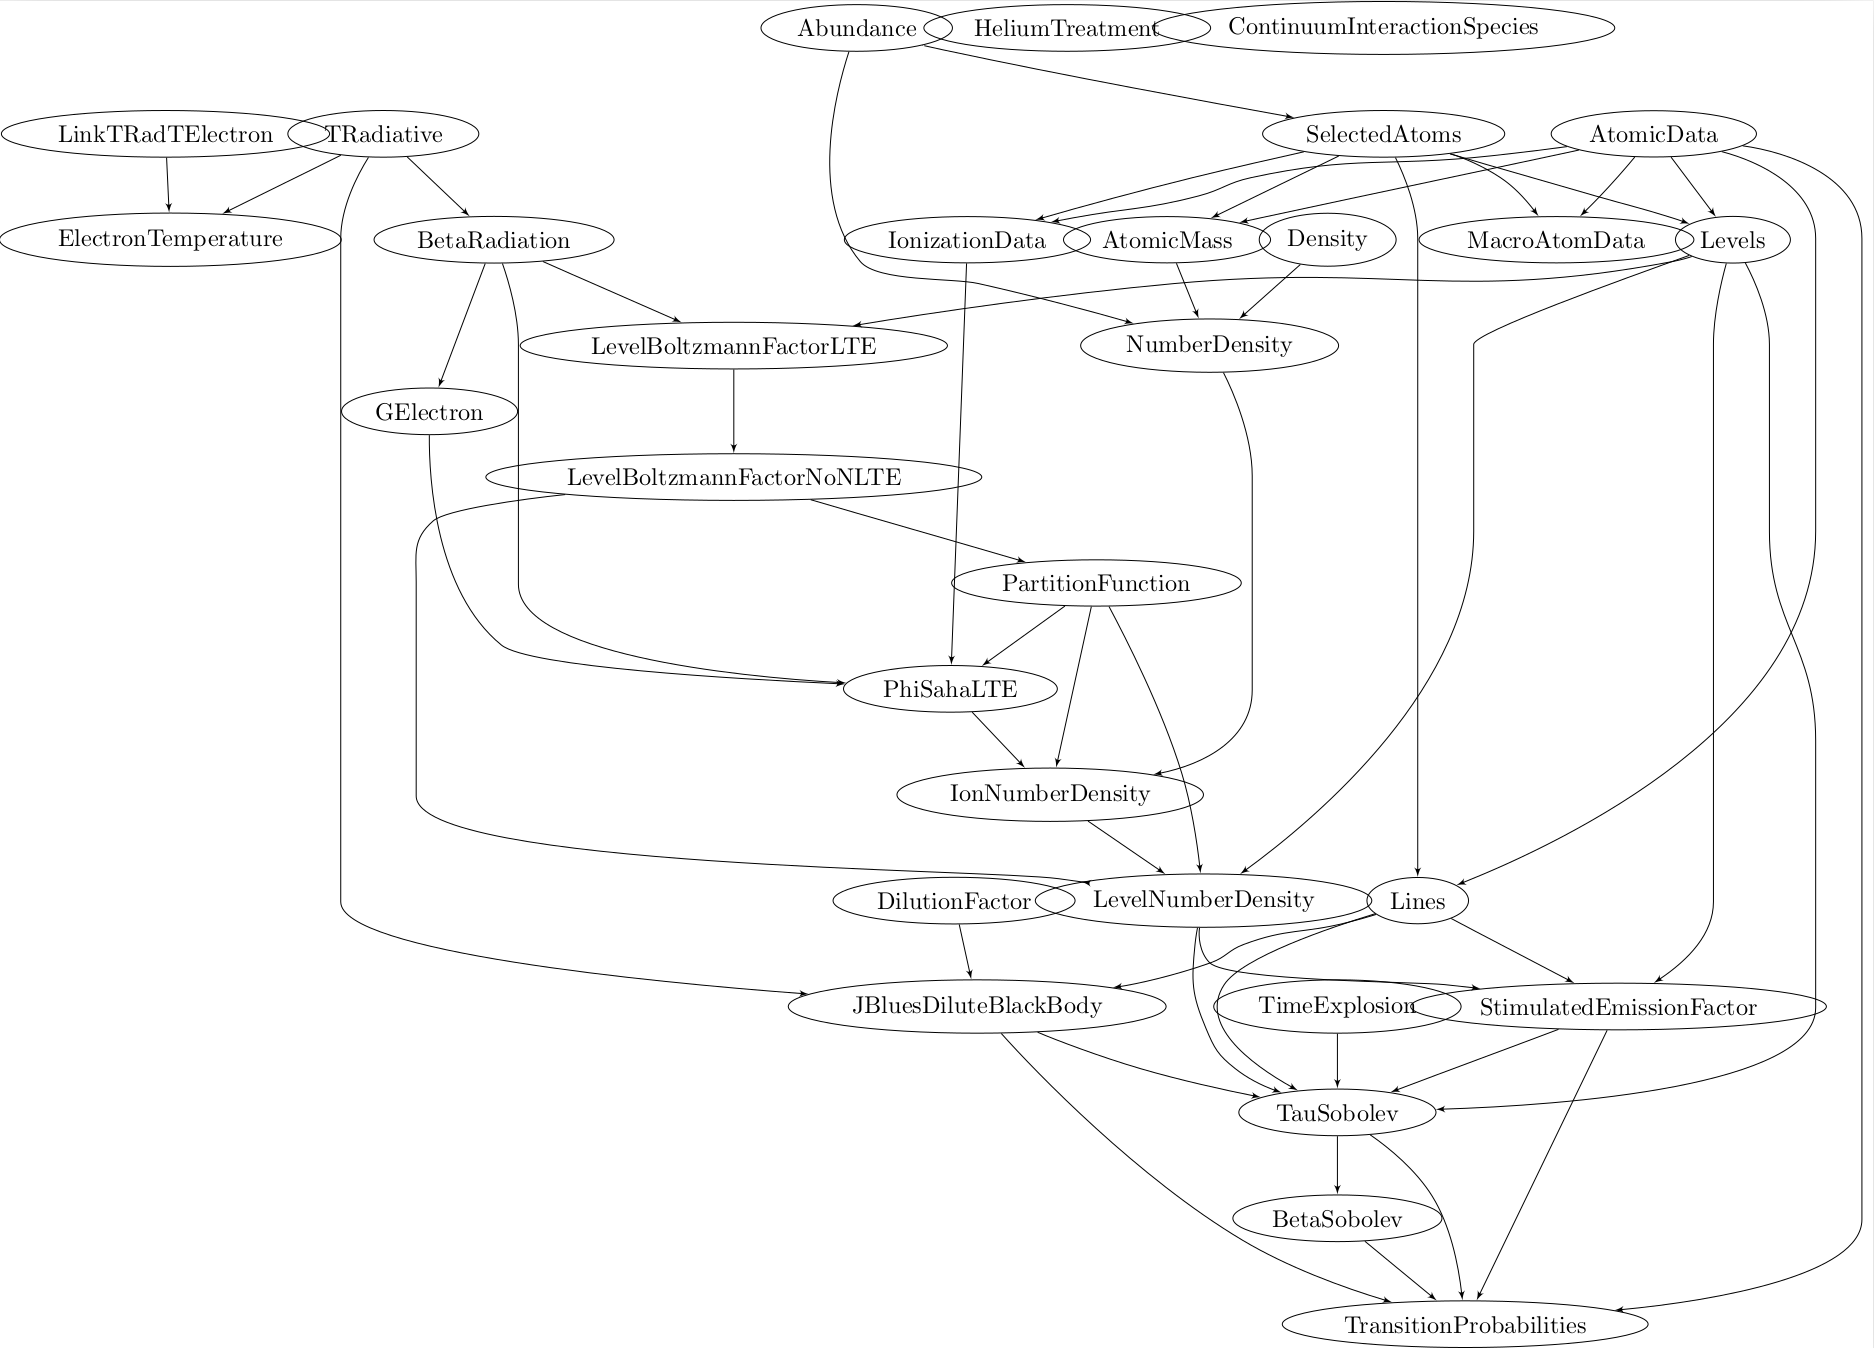

In [12]:
display(Image('plasma_graph_no_eq.png', unconfined=True))

### Plasma Graph with Inputted Arguments

In order to create the .tex file, TARDIS will first convert the graph into a readable [DOT](https://graphviz.org/doc/info/lang.html) format via the `write_to_dot` function. As such, using the `args` parameter within the `write_to_tex` function, one can pass in any Graphviz attribute for TARDIS to implement as a list. In this example, the following attributes are used:

 <ul>
  <li> <code>nodesep</code>: changes spacing of nodes</li>
  <li><code>edge[lblstyle]</code>: edits the edge labels</li>
  <li><code>margin</code>: sets the margins of the outputted graph</li>
  <li><code>ratio</code>: sets the drawing height and width</li>
  <li><code>size</code>: sets the maximum height and width of the graph</li>
</ul> 

For more information on these attributes, visit the [Graphviz attributes documentation](https://graphviz.org/doc/info/attrs.html).

In [13]:
attributes_list = [r"nodesep=1.0", r'edge[lblstyle="fill=white"]', r'margin=0', r'ratio="fill"', r'size="8.3,11.7!"']

sim.plasma.write_to_tex("plasma_graph_with_args.tex", args=attributes_list)

With these attributes, the following graph can be generated:

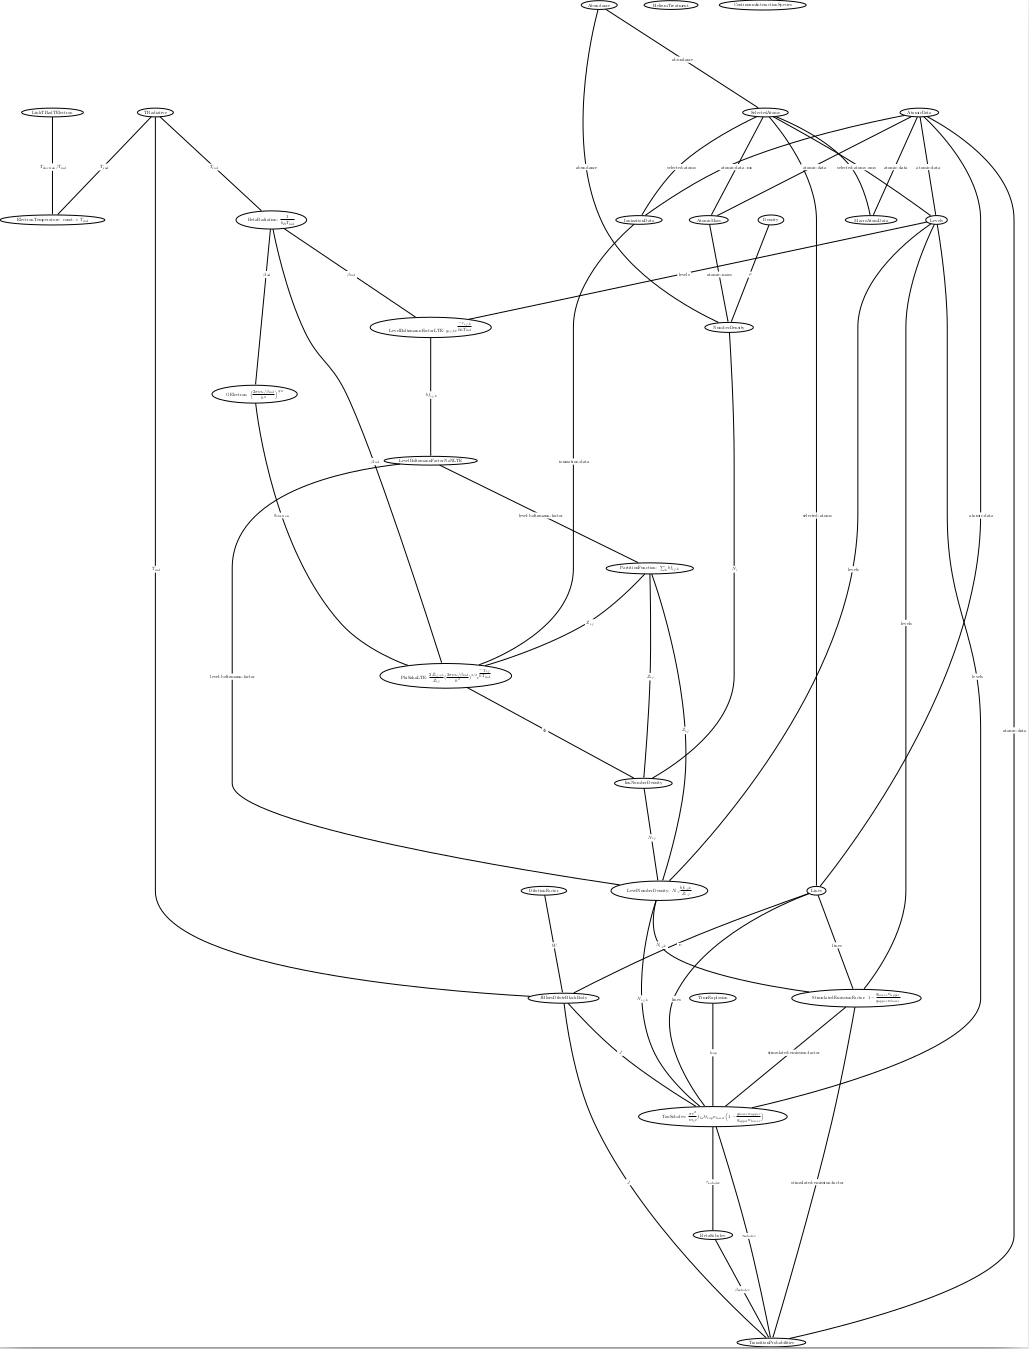

In [14]:
display(Image('plasma_graph_args.png', unconfined=True))